# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

### Importing data

In [2]:
# Importing dataframe
path = r"C:\Users\User\Downloads\df_cleaned.csv"

In [3]:
# Load the data into a DataFrame
df_cleaned = pd.read_csv(path)

In [4]:
df_cleaned.head()

,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,n_victims,n_suspects
0,461105,2013-01-01,Pennsylvania,0,4,Unknown,Unknown,0.0,4,1
1,460726,2013-01-01,California,1,3,Unknown,Unknown,0.0,4,1
2,478855,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,3,2
3,478925,2013-01-05,Colorado,4,0,Unknown,Unknown,0.0,3,1
4,478959,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,3,1


In [5]:
# Display information about the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   incident_id      239677 non-null  int64  
 1   date             239677 non-null  object 
 2   state            239677 non-null  object 
 3   n_killed         239677 non-null  int64  
 4   n_injured        239677 non-null  int64  
 5   gun_stolen       239677 non-null  object 
 6   gun_type         239677 non-null  object 
 7   n_guns_involved  239677 non-null  float64
 8   n_victims        239677 non-null  int64  
 9   n_suspects       239677 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 18.3+ MB


In [6]:
df_cleaned.shape

(239677, 10)

In [7]:
df_cleaned.columns

Index(['incident_id', 'date', 'state', 'n_killed', 'n_injured', 'gun_stolen',
       'gun_type', 'n_guns_involved', 'n_victims', 'n_suspects'],
      dtype='object')

### Creating subset

In [14]:
# Retain only 'date' and 'n_killed' columns
df = df_cleaned[['date', 'n_killed']]

In [16]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, handling errors

In [17]:
# Create a 'month_year' column
df['month_year'] = df['date'].dt.to_period('M')

In [18]:
df['month_year'] = df['month_year'].dt.to_timestamp()

In [19]:
df.drop(columns='date', inplace=True)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Group by 'month_year' and aggregate the sum of 'n_killed'
df = df.groupby(['month_year']).agg({'n_killed': 'sum'})

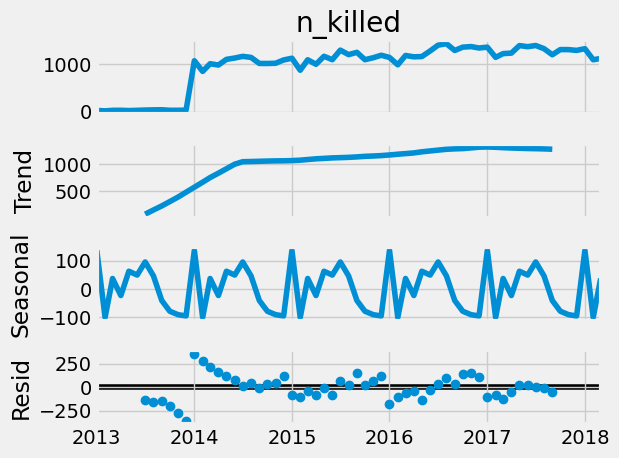

In [23]:
# Perform seasonal decomposition
result_mentions = seasonal_decompose(df['n_killed'], model='additive', period=12)

# Plot the decomposition
result_mentions.plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df['n_killed'])

Dickey-Fuller Stationarity Test:
Test Statistic                -9.577716e+00
p-value                        2.200454e-16
Number of Lags Used            1.100000e+01
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64
